In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
cab_data = pd.read_csv("Datasets/DataSets-main/Cab_Data.csv")
city = pd.read_csv("Datasets/DataSets-main/City.csv")
cust_id = pd.read_csv("Datasets/DataSets-main/Customer_ID.csv")
trans_id = pd.read_csv("Datasets/DataSets-main/Transaction_ID.csv")
holidays = pd.read_csv("Datasets/us-federal-holidays-2011-2020.csv")
weather_city_id = pd.read_csv("Datasets/us_cities_weather/city_info.csv").iloc[:,1:]

# Exploring the data and na

Since what is wanted is to compare pink and yellow cabs and the only dataset with that information is cab_data, I will keep it as a refence to join it the rest with a outer join including the rows that are missing from cab_data in case it had them.

In [3]:
print(np.sum(cab_data==np.nan))
cab_data

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [4]:
10440107-10000011

440096

In [5]:
print(np.sum(city==np.nan))
city

City          0
Population    0
Users         0
dtype: int64


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [6]:
print(np.sum(cust_id==np.nan))
cust_id

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [7]:
print(np.sum(trans_id==np.nan))
trans_id

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [8]:
print(np.sum(holidays==np.nan))
holidays

Date       0
Holiday    0
dtype: int64


,Date,Holiday
0,12/31/2010,New Year's Day
1,1/17/2011,"Birthday of Martin Luther King, Jr."
2,2/21/2011,Washington's Birthday
3,5/30/2011,Memorial Day
4,7/4/2011,Independence Day
...,...,...
95,9/7/2020,Labor Day
96,10/12/2020,Columbus Day
97,11/11/2020,Veterans Day
98,11/26/2020,Thanksgiving Day


It seems like there is no NA in our datasets. So we are going to process the dataset in order to merge it in one with all the variables we can need.

# Merging and processing the data

The weather and the holidays dataset will be used in order to get a better comprenhension of the data we are analysing.

In [9]:
weather_city_id.drop_duplicates(subset ="Name", inplace = True)
weather_city_id["Name"] = weather_city_id["Name"].str.lower()
weather_city_id

,Name,ID,Lat,Lon,Stn.Name,Stn.stDate,Stn.edDate
0,lander,USW00024021,42.8153,-108.7261,LANDER WBO,1892-01-01,1946-05-28
2,cheyenne,USW00024018,41.1519,-104.8061,CHEYENNE WBO,1871-01-01,1935-08-31
4,wausau,USW00014897,44.9258,-89.6256,Wausau Record Herald,1896-01-01,1941-12-31
6,hayward,USW00094973,46.0261,-91.4442,Hayward RS,1894-01-01,1998-03-31
8,eauclaire,USW00014991,44.8664,-91.4878,Eau Claire City,1893-01-01,1949-09-30
...,...,...,...,...,...,...,...
449,muscleshoals,USW00013896,34.7442,-87.5997,Florence,1893-01-01,1940-11-30
451,montgomery,USW00013895,32.2997,-86.4075,MONTGOMERY WB CITY,1873-01-01,1947-12-31
453,mobile,USW00013838,30.6264,-88.0681,MOBILE WB CITY,1871-01-01,1947-12-31
455,huntsville,USW00003856,34.6439,-86.7861,MADISON,1895-01-01,1936-12-31


In [10]:
df = pd.merge(left=cab_data, right=trans_id, left_on='Transaction ID', right_on='Transaction ID', how="left")
df = pd.merge(left=df, right=cust_id, left_on='Customer ID', right_on='Customer ID', how="left")
df["new_date"] = dt.datetime(1899,12,30) + df.loc[:,"Date of Travel"].map(dt.timedelta)
df = df.sort_values("Transaction ID", ignore_index=True).drop("Date of Travel", axis=1)
df

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),new_date
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,2016-01-08
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,2016-01-06
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,2016-01-02
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,2016-01-07
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,2016-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,2018-01-08
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,2018-01-04
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,2018-01-05
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,2018-01-05


In [11]:
cities = list(df["City"].drop_duplicates())
ind = [10, 16, 18]
cities_list = []

for i in range(len(cities)):
    if i not in ind:
        cities_list.append(cities[i][:-2].strip().replace(" ", "").lower())
    else:
        cities_list.append(cities[i].strip().replace(" ", "").lower())

I will describe the 3 cities I had problems with when getting the weather. Dallas was in the dataset with Fort-Worth so we are joining them together to the weather column, since orangecounty is part of the metropolitan area of Los Angeles, it has been included there and last but not least siliconvalley as I could not find San Francisco, the next nearest city was Sacramento. But since we are going to get the temperature as well as the precipitation I consider it a good enough approximation.

In [12]:
weather_cities = list(weather_city_id["Name"])
supp_weather_cities = []
weather_cities_id = []
for city in cities_list:
    if city=="dallas":
        supp_weather_cities.append("dallasfortworth")
        
    elif city=="orangecounty":
        supp_weather_cities.append("losangeles")
    elif city=="siliconvalley":
        supp_weather_cities.append("sacramento")
    elif city in weather_cities:
        supp_weather_cities.append(city)
    else:
        print(f'{city} is not in the weather dataset')
    weather_cities_id.append(weather_city_id["ID"][weather_city_id["Name"]==supp_weather_cities[-1]].values[0])

In [13]:
def substring_in_list(strings, substring):
    strings_with_substring = [string for string in strings if substring in string]
    return strings_with_substring

strings = weather_cities 
substring = "san"

substring_in_list(strings, substring)

['sanantonio', 'sandiego', 'losangeles']

In [14]:
zip_iterator = zip(cities, cities_list)
cities_dict = dict(zip_iterator)
df.replace({"City": cities_dict}, inplace=True)

After deciding the name-id of the city we are going to use, it is necessary to merge considering the date and the city to add them their respective weather to their row.

In [15]:
df_list = []

for i in range(len(weather_cities_id)):
    
    id_ = weather_cities_id[i]
    city_name = cities_list[i]
    df2 = df[df['City']==city_name]
    fechas = df['new_date'][df['City']==city_name]
    weather_city = pd.read_csv(f'Datasets/us_cities_weather/{id_}.csv').iloc[:,1:]
    weather_city['Date'] = pd.to_datetime(weather_city['Date'])
    weather = pd.merge(left=weather_city, right=df2, left_on='Date', right_on='new_date', how="right")
    weather.drop('new_date', axis=1, inplace=True)
    df_list.append(weather)
    
final_df = pd.concat(df_list, axis=0)

In [16]:
final_df['Holidays'] = final_df['Date'].isin(pd.to_datetime(holidays['Date'])).astype('float')

In [17]:
final_df['Weekend'] = ((pd.DatetimeIndex(final_df['Date']).dayofweek) // 5 == 1).astype(float)
final_df['DayOfWeek'] = pd.DatetimeIndex(final_df['Date']).dayofweek

In [84]:
final_df['Year'] = pd.DatetimeIndex(final_df['Date']).year
final_df['Quarter'] = final_df['Date'].dt.quarter

In [85]:
df.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),new_date
0,10000011,Pink Cab,atlanta,30.45,370.95,313.635,29290,Card,Male,28,10813,2016-01-08
1,10000012,Pink Cab,atlanta,28.62,358.52,334.854,27703,Card,Male,27,9237,2016-01-06
2,10000013,Pink Cab,atlanta,9.04,125.20,97.632,28712,Cash,Male,53,11242,2016-01-02
3,10000014,Pink Cab,atlanta,33.17,377.40,351.602,28020,Cash,Male,23,23327,2016-01-07
4,10000015,Pink Cab,atlanta,8.73,114.62,97.776,27182,Card,Male,33,8536,2016-01-03


In [86]:
final_df = final_df.sort_values("Transaction ID", ignore_index=True)
final_df

,Date,tmax,tmin,prcp,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,...,Payment_Mode,Gender,Age,Income (USD/Month),Holidays,Weekend,DayOfWeek,Year,Profits,Quarter
0,2016-01-08,54.0,48.0,0.21,10000011,Pink Cab,atlanta,30.45,370.95,313.6350,...,Card,Male,28,10813,0.0,0.0,4,2016,57.3150,1
1,2016-01-06,46.0,26.0,0.00,10000012,Pink Cab,atlanta,28.62,358.52,334.8540,...,Card,Male,27,9237,0.0,0.0,2,2016,23.6660,1
2,2016-01-02,47.0,35.0,0.00,10000013,Pink Cab,atlanta,9.04,125.20,97.6320,...,Cash,Male,53,11242,0.0,1.0,5,2016,27.5680,1
3,2016-01-07,60.0,40.0,0.00,10000014,Pink Cab,atlanta,33.17,377.40,351.6020,...,Cash,Male,23,23327,0.0,0.0,3,2016,25.7980,1
4,2016-01-03,53.0,35.0,0.00,10000015,Pink Cab,atlanta,8.73,114.62,97.7760,...,Card,Male,33,8536,0.0,1.0,6,2016,16.8440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,2018-01-08,39.0,19.2,0.06,10440101,Yellow Cab,washingtondc,4.80,69.24,63.3600,...,Cash,Male,24,15651,0.0,0.0,0,2018,5.8800,1
359388,2018-01-04,27.1,16.2,0.10,10440104,Yellow Cab,washingtondc,8.40,113.75,106.8480,...,Cash,Male,32,6528,0.0,0.0,3,2018,6.9020,1
359389,2018-01-05,21.2,13.1,0.00,10440105,Yellow Cab,washingtondc,27.75,437.07,349.6500,...,Cash,Male,56,7966,0.0,0.0,4,2018,87.4200,1
359390,2018-01-05,21.2,13.1,0.00,10440106,Yellow Cab,washingtondc,8.80,146.19,114.0480,...,Card,Male,32,6423,0.0,0.0,4,2018,32.1420,1


Once we have constructed the dataset, we will procceed to the analysis

# Exploratory Data Analysis

In [87]:
final_df['Profits'] = final_df['Price Charged'] - final_df['Cost of Trip']
pink_df = final_df[final_df['Company']=='Pink Cab']
yellow_df = final_df[final_df['Company']=='Yellow Cab']
final_df.describe()

,tmax,tmin,prcp,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Holidays,Weekend,DayOfWeek,Year,Profits,Quarter
count,359316.000000,359268.000000,359364.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.00000,359392.000000,359392.000000,359392.000000,359392.000000
mean,67.248370,51.043007,0.105799,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,0.019655,0.41332,3.750620,2017.045199,137.253198,2.817628
std,18.508473,16.650553,0.328055,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,0.138813,0.49243,1.858849,0.800239,160.311840,1.107687
min,1.200000,-15.000000,0.000000,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,0.000000,0.00000,0.000000,2016.000000,-220.060000,1.000000
25%,53.100000,39.000000,0.000000,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,0.000000,0.00000,3.000000,2016.000000,28.012000,2.000000
50%,71.000000,54.000000,0.000000,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,0.000000,0.00000,4.000000,2017.000000,81.962000,3.000000
75%,82.000000,64.000000,0.020000,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,0.000000,1.00000,5.000000,2018.000000,190.030000,4.000000
max,119.000000,93.900000,5.850000,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,1.000000,1.00000,6.000000,2018.000000,1463.966000,4.000000


In [88]:
pink_df

,Date,tmax,tmin,prcp,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,...,Payment_Mode,Gender,Age,Income (USD/Month),Holidays,Weekend,DayOfWeek,Year,Profits,Quarter
0,2016-01-08,54.0,48.0,0.21,10000011,Pink Cab,atlanta,30.45,370.95,313.635,...,Card,Male,28,10813,0.0,0.0,4,2016,57.315,1
1,2016-01-06,46.0,26.0,0.00,10000012,Pink Cab,atlanta,28.62,358.52,334.854,...,Card,Male,27,9237,0.0,0.0,2,2016,23.666,1
2,2016-01-02,47.0,35.0,0.00,10000013,Pink Cab,atlanta,9.04,125.20,97.632,...,Cash,Male,53,11242,0.0,1.0,5,2016,27.568,1
3,2016-01-07,60.0,40.0,0.00,10000014,Pink Cab,atlanta,33.17,377.40,351.602,...,Cash,Male,23,23327,0.0,0.0,3,2016,25.798,1
4,2016-01-03,53.0,35.0,0.00,10000015,Pink Cab,atlanta,8.73,114.62,97.776,...,Card,Male,33,8536,0.0,1.0,6,2016,16.844,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357449,2018-01-06,21.2,11.1,0.00,10437610,Pink Cab,washingtondc,13.56,184.19,135.600,...,Card,Female,40,3122,0.0,1.0,5,2018,48.590,1
357450,2018-12-31,51.1,39.0,0.48,10437611,Pink Cab,washingtondc,29.68,388.08,302.736,...,Card,Female,29,19676,0.0,0.0,0,2018,85.344,4
357451,2018-01-07,23.2,8.2,0.00,10437612,Pink Cab,washingtondc,28.50,369.04,310.650,...,Card,Male,37,22765,0.0,1.0,6,2018,58.390,1
357452,2018-01-02,26.2,13.1,0.00,10437614,Pink Cab,washingtondc,16.10,194.17,162.610,...,Cash,Male,18,12364,0.0,0.0,1,2018,31.560,1


In [89]:
yellow_df

,Date,tmax,tmin,prcp,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,...,Payment_Mode,Gender,Age,Income (USD/Month),Holidays,Weekend,DayOfWeek,Year,Profits,Quarter
233,2016-01-02,47.0,35.0,0.00,10000384,Yellow Cab,atlanta,33.93,1341.17,464.1624,...,Card,Male,23,8542,0.0,1.0,5,2016,877.0076,1
234,2016-01-09,51.0,47.0,0.37,10000385,Yellow Cab,atlanta,42.18,1412.06,516.2832,...,Cash,Male,28,3901,0.0,1.0,5,2016,895.7768,1
235,2016-01-03,53.0,35.0,0.00,10000386,Yellow Cab,atlanta,10.60,364.62,132.2880,...,Cash,Male,32,13505,0.0,1.0,6,2016,232.3320,1
236,2016-01-06,46.0,26.0,0.00,10000387,Yellow Cab,atlanta,26.75,838.00,333.8400,...,Cash,Male,39,28386,0.0,0.0,2,2016,504.1600,1
237,2016-01-07,60.0,40.0,0.00,10000388,Yellow Cab,atlanta,46.02,1540.61,596.4192,...,Card,Male,35,17761,0.0,0.0,3,2016,944.1908,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,2018-01-08,39.0,19.2,0.06,10440101,Yellow Cab,washingtondc,4.80,69.24,63.3600,...,Cash,Male,24,15651,0.0,0.0,0,2018,5.8800,1
359388,2018-01-04,27.1,16.2,0.10,10440104,Yellow Cab,washingtondc,8.40,113.75,106.8480,...,Cash,Male,32,6528,0.0,0.0,3,2018,6.9020,1
359389,2018-01-05,21.2,13.1,0.00,10440105,Yellow Cab,washingtondc,27.75,437.07,349.6500,...,Cash,Male,56,7966,0.0,0.0,4,2018,87.4200,1
359390,2018-01-05,21.2,13.1,0.00,10440106,Yellow Cab,washingtondc,8.80,146.19,114.0480,...,Card,Male,32,6423,0.0,0.0,4,2018,32.1420,1


We are going to ask a few questions:

- Table with Which one has more profits/ride, profits/km, absolute profits, profits per city and clasifications by categories.
- How it influences the temp, precipitations, weekend, holidays
- Demographic study for each cab(frequency ID, gender, age, income,...)
- Timeseries analysis: profits, seasonality, ...

With that analysis I will answer:
- More growth yearly (number of rides and profits)
- More loyalty
- Dominance in all the cities?
- More price-cost rate?

## Profit

In [24]:
prof_ride = pd.DataFrame([sum(yellow_df['Profits'])/yellow_df.shape[0], 
                          sum(pink_df['Profits'])/pink_df.shape[0]], 
                         columns=['prof/ride'], index=['Yellow', 'Pink'])

prof_km = pd.DataFrame([sum(yellow_df['Profits'])/sum(yellow_df['KM Travelled']), 
                          sum(pink_df['Profits'])/sum(pink_df['KM Travelled'])], 
                         columns=['prof/km'], index=['Yellow', 'Pink'])

prof = pd.DataFrame([sum(yellow_df['Profits']), 
                          sum(pink_df['Profits'])], 
                         columns=['total profits'], index=['Yellow', 'Pink'])

price_cost_rate = pd.DataFrame([np.mean(yellow_df['Price Charged']/yellow_df['Cost of Trip']), 
                          np.mean(pink_df['Price Charged']/pink_df['Cost of Trip'])], 
                         columns=['% profit(price/cost rate)'], index=['Yellow', 'Pink']) - 1

profits_table = pd.concat([prof_ride, prof_km, prof, price_cost_rate], axis=1)
profits_perc_table = profits_table/profits_table.sum(axis=0)*100
profits_table

,prof/ride,prof/km,total profits,% profit(price/cost rate)
Yellow,160.259986,7.100727,4.402037e+07,0.542966
Pink,62.652174,2.777146,5.307328e+06,0.255596


In [25]:
price_km = pd.DataFrame([np.sum(yellow_df['Price Charged'])/np.sum(yellow_df['KM Travelled']), 
                         np.sum(pink_df['Price Charged'])/np.sum(pink_df['KM Travelled'])],
                         columns=['price/km'], index=['Yellow', 'Pink'])
cost_km = pd.DataFrame([np.sum(yellow_df['Cost of Trip'])/np.sum(yellow_df['KM Travelled']), 
                         np.sum(pink_df['Cost of Trip'])/np.sum(pink_df['KM Travelled'])],
                         columns=['cost/km'], index=['Yellow', 'Pink'])

price_ride = pd.DataFrame([np.sum(yellow_df['Price Charged'])/yellow_df.shape[0], 
                         np.sum(pink_df['Price Charged'])/pink_df.shape[0]],
                         columns=['price/ride'], index=['Yellow', 'Pink'])
cost_ride = pd.DataFrame([np.sum(yellow_df['Cost of Trip'])/yellow_df.shape[0], 
                         np.sum(pink_df['Cost of Trip'])/pink_df.shape[0]],
                         columns=['cost/ride'], index=['Yellow', 'Pink'])

pd.concat([price_km, cost_km, price_ride, cost_ride], axis=1)

,price/km,cost/km,price/ride,cost/ride
Yellow,20.300921,13.200194,458.181990,297.922004
Pink,13.776685,10.999539,310.800856,248.148682


In [26]:
def barplot_two_groups(labels, v1, v2, l1, l2, ylabel='', title='', dim=[12, 8], col=['gold', 'pink']):

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    plt.rcParams['figure.figsize'] = dim
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, v1, width, label=l1, color=col[0])
    rects2 = ax.bar(x + width/2, v2, width, label=l2, color=col[1])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    #fig.tight_layout()

    plt.show()

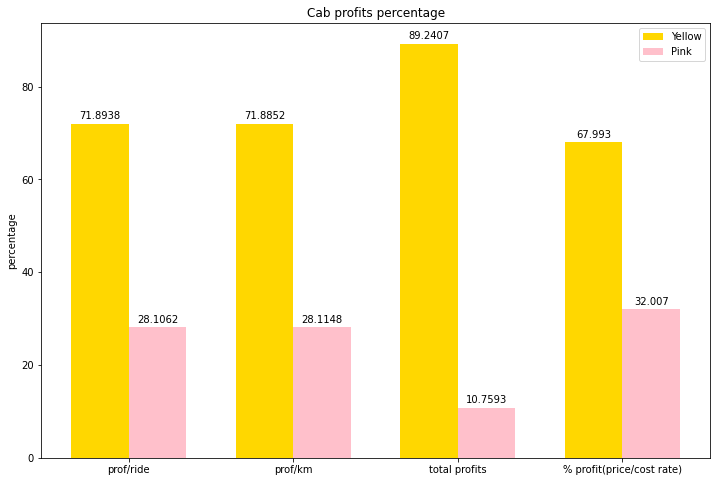

In [27]:
barplot_two_groups(list(profits_table.columns), 
                   profits_perc_table.loc['Yellow'].values,
                   profits_perc_table.loc['Pink'].values,
                   'Yellow', 'Pink', 'percentage', 'Cab profits percentage')

In [28]:
profits_city = pd.concat([yellow_df.groupby('City').sum()['Profits'], pink_df.groupby('City').sum()['Profits']], axis=1)
profits_city.columns = ['Yellow', 'Pink']
profits_city_plot = profits_city/pd.DataFrame(profits_city.sum(axis=1)).values*100
profits_city_plot = profits_city_plot.loc[profits_city.sum(axis=1).sort_values()[-5:].index]
profits_city

,Yellow,Pink
City,,
atlanta,7.463828e+05,96050.076
austin,3.792557e+05,147445.290
boston,1.506718e+06,262001.698
chicago,3.068591e+06,318722.488
dallas,1.104003e+06,24730.112
denver,3.570001e+05,40584.939
losangeles,3.285977e+06,1125732.065
miami,5.960001e+05,162301.191
nashville,8.524768e+04,64284.534


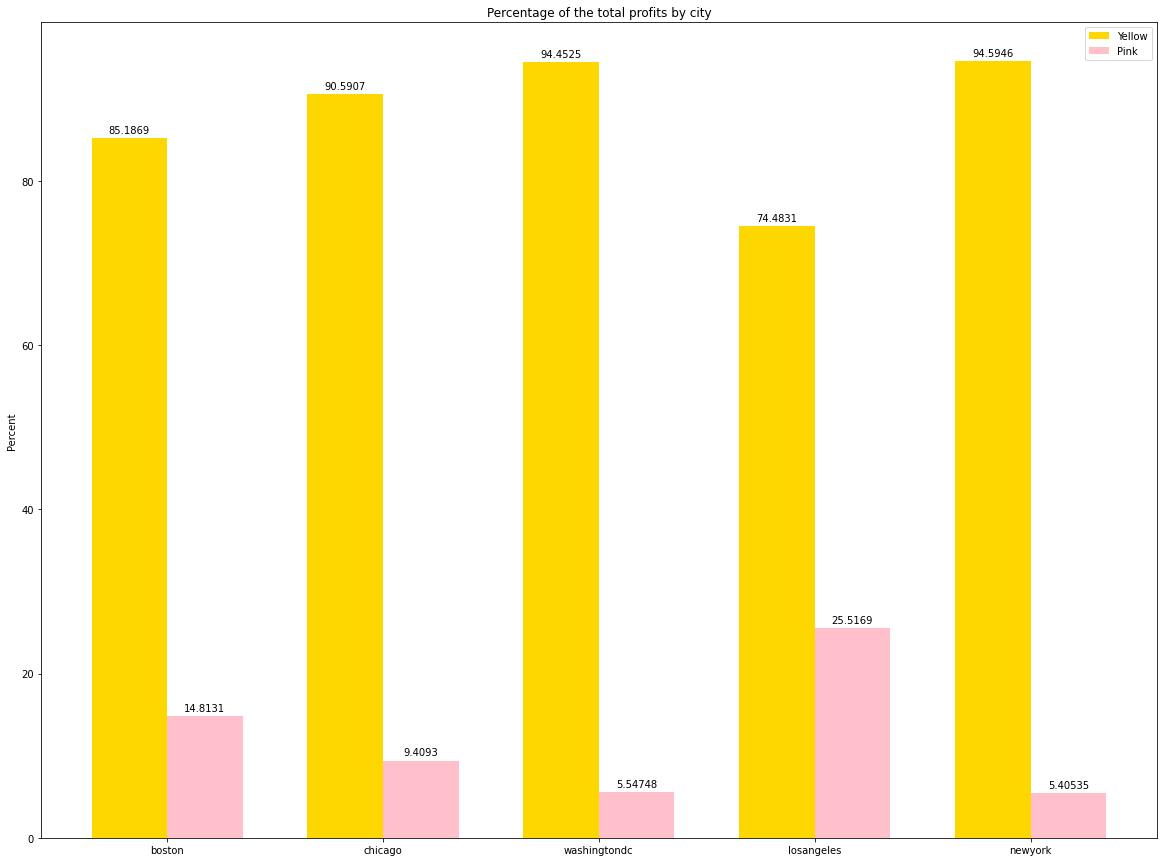

In [29]:
barplot_two_groups(list(profits_city_plot.index), 
                   profits_city_plot['Yellow'].values,
                   profits_city_plot['Pink'].values,
                   'Yellow', 'Pink', 'Percent', 'Percentage of the total profits by city', [20,15])

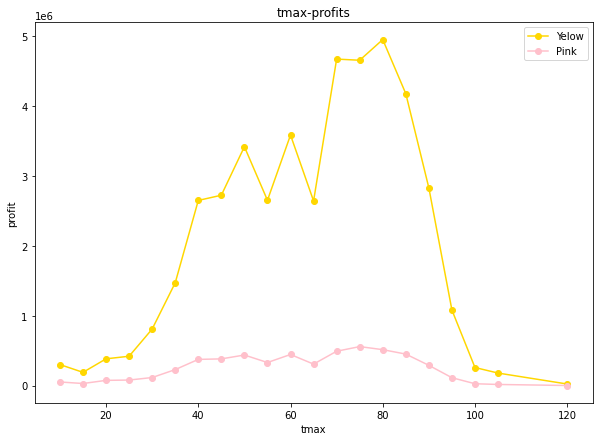

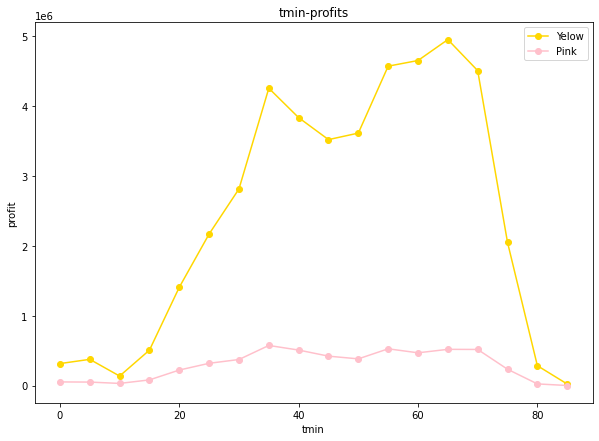

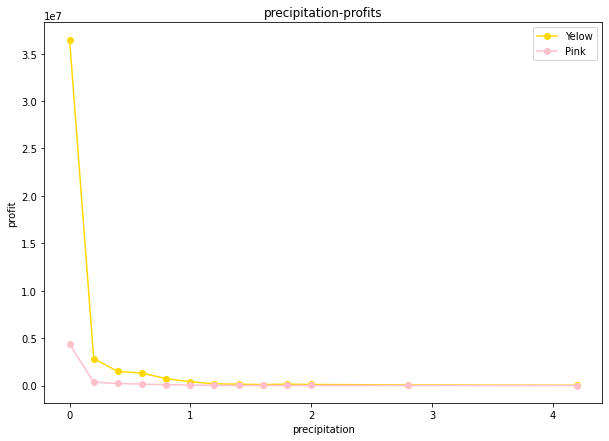

In [30]:
# Total profit by weather

prof_date = pd.concat([yellow_df.groupby('Date').sum()['Profits'], pink_df.groupby('Date').sum()['Profits']], axis=1)
prof_date.columns = ['Yellow', 'Pink']
weather_date = yellow_df.sort_values('Date').drop_duplicates(subset ='Date')[['Date', 'tmax', 'tmin', 'prcp']]
weather_date.index = weather_date['Date']
weather_date.drop('Date', axis=1, inplace=True)
weather_prof = pd.concat([prof_date, weather_date], axis=1)
weather_prof[['tmax', 'tmin']] = np.round(weather_prof[['tmax', 'tmin']]/5)*5
weather_prof['prcp'] = np.round(weather_prof['prcp']/0.2)*0.2
tmax_prof = weather_prof.groupby('tmax').sum()[['Yellow', 'Pink']]
tmin_prof = weather_prof.groupby('tmin').sum()[['Yellow', 'Pink']]
percp_prof = weather_prof.groupby('prcp').sum()[['Yellow', 'Pink']]

plt.rcParams['figure.figsize'] = [10,7]

plt.plot(tmax_prof.index, tmax_prof['Yellow'], 'o-', color='gold')
plt.plot(tmax_prof.index, tmax_prof['Pink'], 'o-', color='pink')
plt.title('tmax-profits')
plt.xlabel('tmax')
plt.ylabel('profit')
plt.legend(['Yelow', 'Pink'])
plt.show()

plt.plot(tmin_prof.index, tmin_prof['Yellow'], 'o-', color='gold')
plt.plot(tmin_prof.index, tmin_prof['Pink'], 'o-', color='pink')
plt.title('tmin-profits')
plt.xlabel('tmin')
plt.ylabel('profit')
plt.legend(['Yelow', 'Pink'])
plt.show()

plt.plot(percp_prof.index, percp_prof['Yellow'], 'o-', color='gold')
plt.plot(percp_prof.index, percp_prof['Pink'], 'o-', color='pink')
plt.title('precipitation-profits')
plt.xlabel('precipitation')
plt.ylabel('profit')
plt.legend(['Yelow', 'Pink'])
plt.show()

As expected, there is more profits coming from days with a reasonable temperature probably because people tend to hang out more. The same happens with the precipitation. The more it rains, the less the people go out.

,Yellow,Pink
Year,,
2016,1.392700e+07,1713511.224
2017,1.657598e+07,2033654.908
2018,1.351740e+07,1560162.189


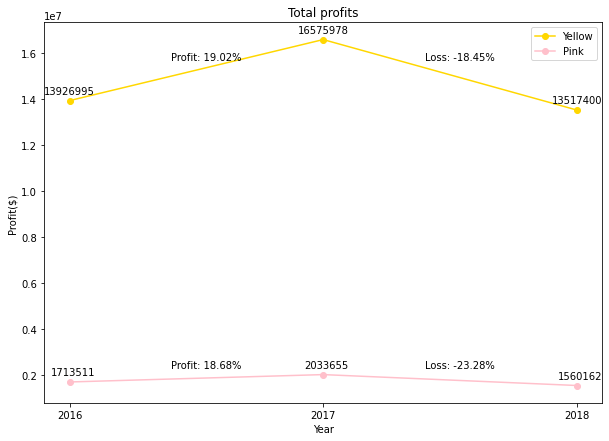

## Number of customers

In [33]:
freq_date_yellow = yellow_df['Date'].value_counts()
freq_date_pink = pink_df['Date'].value_counts()
freq_date = pd.concat([freq_date_yellow, freq_date_pink], axis=1)
freq_date.columns = ['Yellow', 'Pink']
freq_date['Date'] = freq_date.index

holiday_date = yellow_df.sort_values('Date').drop_duplicates(subset ='Date')[['Date', 'Holidays']]
weekend_date = yellow_df.sort_values('Date').drop_duplicates(subset ='Date')[['Date', 'Weekend']]
holiday_freq = pd.merge(left=freq_date, right=holiday_date, left_on='Date', right_on='Date')
weekend_freq = pd.merge(left=freq_date, right=weekend_date, left_on='Date', right_on='Date')

mean_freq_yellow = pd.DataFrame([np.mean(weekend_freq['Yellow'].loc[np.logical_and(weekend_freq['Weekend']==0, holiday_freq['Holidays']==0)]),
                                         np.mean(weekend_freq['Yellow'].loc[np.logical_or(weekend_freq['Weekend']==1,holiday_freq['Holidays']==1)])],
                                        columns=['Yellow'], index=['Workday', 'No workday'])

mean_freq_pink = pd.DataFrame([np.mean(weekend_freq['Pink'].loc[np.logical_and(weekend_freq['Weekend']==0, holiday_freq['Holidays']==0)]),
                                         np.mean(weekend_freq['Pink'].loc[np.logical_or(weekend_freq['Weekend']==1,holiday_freq['Holidays']==1)])],
                                        columns=['Pink'], index=['Workday', 'No workday'])

mean_freq = pd.concat([mean_freq_yellow, mean_freq_pink], axis=1)

mean_freq

,Yellow,Pink
Workday,206.917553,64.071809
No workday,347.169096,106.498542


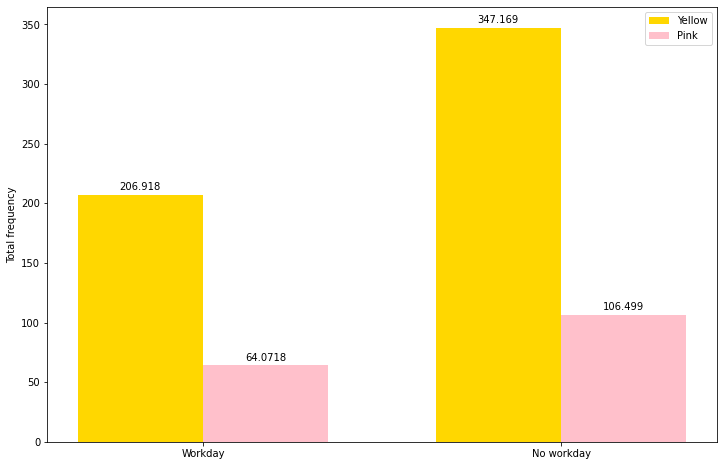

In [34]:
barplot_two_groups(['Workday', 'No workday'], mean_freq['Yellow'], mean_freq['Pink'], 'Yellow', 'Pink', ylabel='Total frequency', title='')

In [83]:
freq_weekday_yellow = yellow_df['DayOfWeek'].value_counts()
freq_weekday_pink = pink_df['DayOfWeek'].value_counts()
freq_weekday = pd.concat([freq_weekday_yellow, freq_weekday_pink], axis=1)
freq_weekday.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
freq_weekday.columns = ['Yellow', 'Pink']
freq_weekday

,Yellow,Pink
Mon,22705,7032
Tue,22783,7077
Wed,23026,7076
Thu,30198,9549
Fri,62153,19249
Sat,59981,18253
Sun,53835,16475


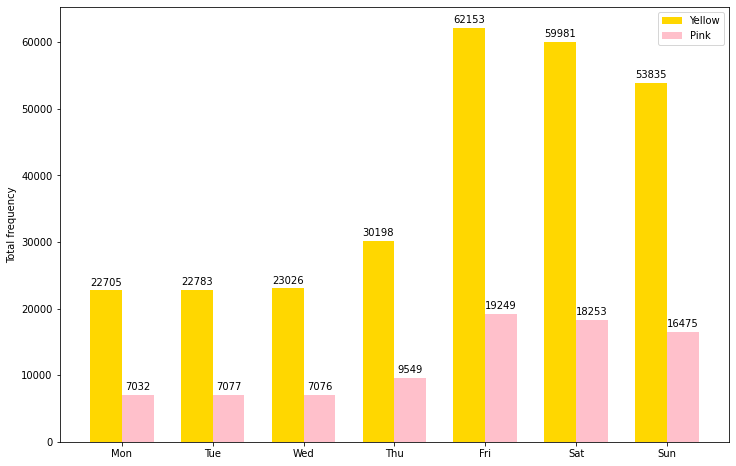

In [36]:
barplot_two_groups(freq_weekday.index, freq_weekday['Yellow'], freq_weekday['Pink'], 'Yellow', 'Pink', ylabel='Total frequency', title='')

## Time

In [78]:
prof_year_yellow = yellow_df.groupby('Year').sum()['Profits']
prof_year_pink = pink_df.groupby('Year').sum()['Profits']
prof_year = pd.concat([prof_year_yellow, prof_year_pink], axis=1)
prof_year.columns = ['Yellow', 'Pink']
prof_year

,Yellow,Pink
Year,,
2016,1.392700e+07,1713511.224
2017,1.657598e+07,2033654.908
2018,1.351740e+07,1560162.189


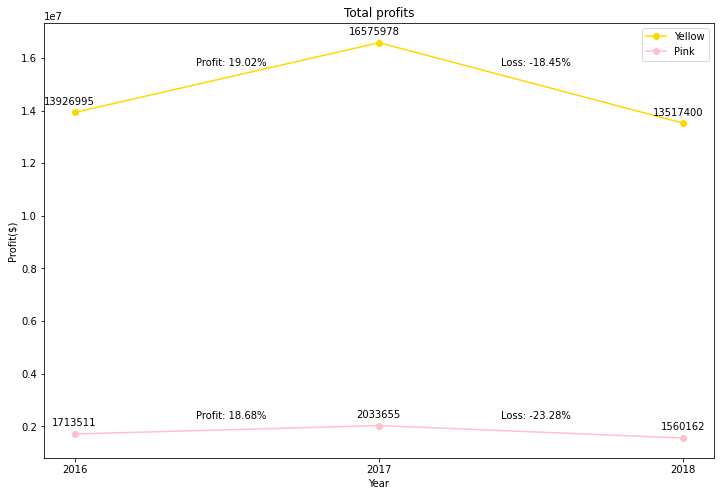

In [79]:
year = [2016, 2017, 2018]
fig, ax = plt.subplots()
ax.plot(prof_year_yellow.index, prof_year['Yellow'], 'o-', color='gold')
ax.plot(prof_year_pink.index, prof_year['Pink'], 'o-', color='pink')
plt.title('Total profits')
plt.xlabel('Year')
plt.xticks(year)
plt.ylabel('Profit($)')


for i in range(prof_year_yellow.shape[0]):
    ax.annotate(int(np.round(prof_year_yellow.iloc[i])), (year[i] - 0.1, prof_year_yellow.iloc[i] + 0.03 * 10**7))
    ax.annotate(int(np.round(prof_year_pink.iloc[i])), (year[i] - 0.075, prof_year_pink.iloc[i] + 0.03 * 10**7))
    
    
for i in range(prof_year_yellow.shape[0]-1):
    y1 = 1.57 * 10**7
    z1 = year[i] + 0.4
    n1 = np.round(prof_year_yellow.iloc[i+1]/prof_year_yellow.iloc[i] - 1, 4) * 100
    if n1 > 0:
        txt1 = f'Profit: {n1}%'
    elif n1<0:
        txt1 = f'Loss: {n1}%'
    else:
        print('No movement')
    ax.annotate(txt1, (z1, y1))
    
    y2 = 0.23 * 10**7
    n2 = np.round(prof_year_pink.iloc[i+1]/prof_year_pink.iloc[i] - 1, 4) * 100
    if n2 > 0:
        txt2 = f'Profit: {n2}%'
    elif n1<0:
        txt2 = f'Loss: {n2}%'
    else:
        txt2 = '0%'
        print('No movement')
    ax.annotate(txt2, (z1, y2))

ax.legend(['Yellow', 'Pink'])

plt.show()

In [80]:
freq_year_yellow = yellow_df['Year'].value_counts()
freq_year_pink = pink_df['Year'].value_counts()
freq_year = pd.concat([freq_year_yellow, freq_year_pink], axis=1)
freq_year.columns = ['Yellow', 'Pink']
freq_year

,Yellow,Pink
2017,98189,30321
2018,94253,29310
2016,82239,25080


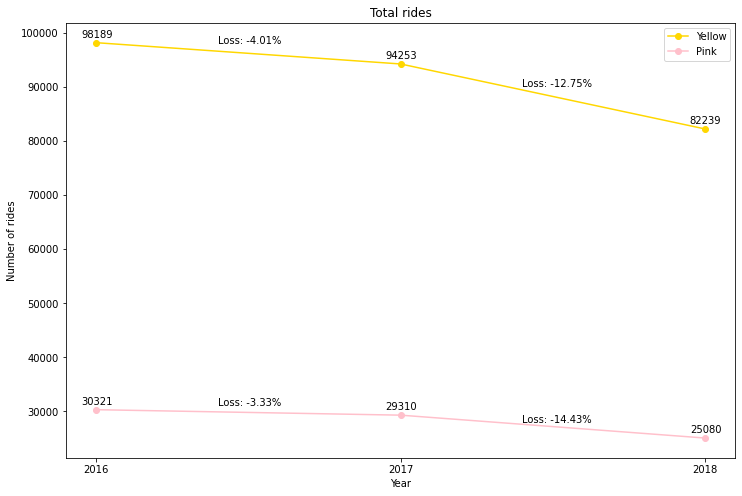

In [82]:
year = [2016, 2017, 2018]
fig, ax = plt.subplots()
ax.plot(year, freq_year['Yellow'], 'o-', color='gold')
ax.plot(year, freq_year['Pink'], 'o-', color='pink')
plt.title('Total rides')
plt.xlabel('Year')
plt.xticks(year)
plt.ylabel('Number of rides')


for i in range(prof_year_yellow.shape[0]):
    ax.annotate(int(np.round(freq_year_yellow.iloc[i])), (year[i]- 0.05, freq_year_yellow.iloc[i] + 1000))
    ax.annotate(int(np.round(freq_year_pink.iloc[i])), (year[i] - 0.05, freq_year_pink.iloc[i] + 1000))
    
    
for i in range(prof_year_yellow.shape[0]-1):
    y1 = [98000, 90000]
    z1 = year[i] + 0.4
    n1 = np.round(freq_year_yellow.iloc[i+1]/freq_year_yellow.iloc[i] - 1, 4) * 100
    if n1 > 0:
        txt1 = f'Profit: {n1}%'
    elif n1<0:
        txt1 = f'Loss: {n1}%'
    else:
        print('No movement')
    ax.annotate(txt1, (z1, y1[i]))
    
    y2 = [31000, 28000]
    n2 = np.round((freq_year_pink.iloc[i+1]/freq_year_pink.iloc[i] - 1)*100, 2)
    if n2 > 0:
        txt2 = f'Profit: {n2}%'
    elif n1<0:
        txt2 = f'Loss: {n2}%'
    else:
        txt2 = '0%'
        print('No movement')
    ax.annotate(txt2, (z1, y2[i]))

ax.legend(['Yellow', 'Pink'])

plt.show()

What we can see is that not necessary profits grow when rides increase, since here each year has less rides than the one before but there was profit from 2016 to 2017.

## Seasonality

In [182]:
seas_profits_yellow = yellow_df.groupby(['Year', 'Quarter']).sum()['Profits']
seas_profits_pink = pink_df.groupby(['Year', 'Quarter']).sum()['Profits']
seas_profits = pd.concat([seas_profits_yellow, seas_profits_pink], axis=1)
seas_profits.columns = ['Yellow', 'Pink']

In [183]:
year = ['2016'] * 4 + ['2017'] * 4 + ['2018'] * 4
quarter = ['1', '2', '3', '4'] * 3
index = [(year[i] + 'Q' + quarter[i]) for i in range(12)]
seas_profits.index = index

In [184]:
seas_profits

,Yellow,Pink
2016Q1,2.760242e+06,249229.590
2016Q2,3.479802e+06,215246.063
2016Q3,3.197748e+06,381375.523
2016Q4,4.489204e+06,867660.048
2017Q1,3.602691e+06,358923.005
2017Q2,3.924204e+06,256717.349
2017Q3,3.760759e+06,466195.359
2017Q4,5.288324e+06,951819.195
2018Q1,3.122696e+06,331039.887
2018Q2,3.235419e+06,175183.830


Text(0, 0.5, 'Profit($)')

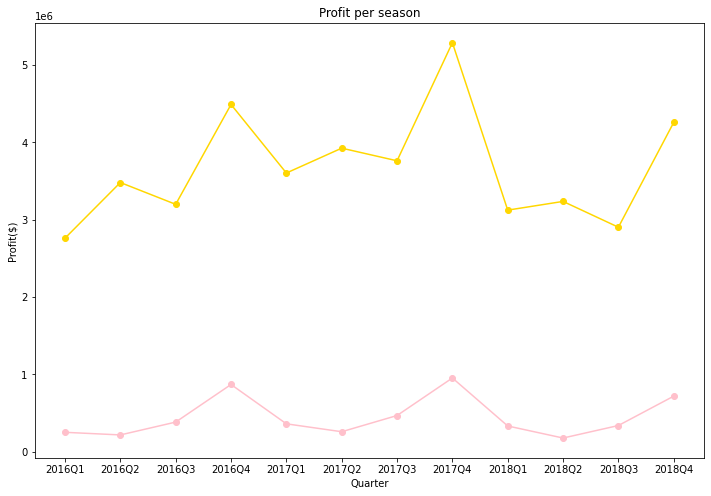

In [188]:
fig, ax = plt.subplots()
ax.plot(index, seas_profits['Yellow'], 'o-', color='gold')
ax.plot(index, seas_profits['Pink'], 'o-', color='pink')
plt.title('Profit per season')
plt.xlabel('Quarter')
plt.ylabel('Profit($)')

There is a clear seasonality. In both cases the q4 is more profitable. However, in the other 3 both companies make the opposite form. Yellow increases its profit from Q1 to Q2 and decreases after from Q2 to Q3 while Pink decreases its profit and after that increases it. Apart from that, in comparison, yellow cabs are still far over pink ones.

## Loyalty

In [39]:
freq_customer_yellow = yellow_df['Customer ID'].value_counts()
freq_customer_pink = pink_df['Customer ID'].value_counts()

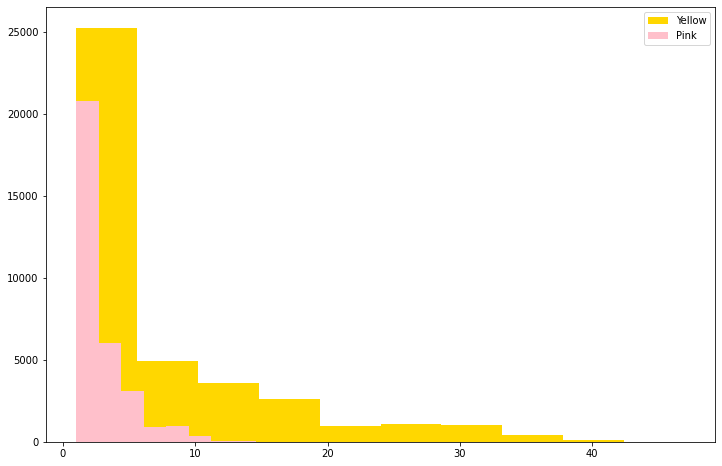

In [46]:
plt.hist(freq_customer_yellow, color='Gold')
plt.hist(freq_customer_pink, color='Pink')
plt.legend(['Yellow', 'Pink'])

The loyalty is far bigger in the yellow cabs not only in frequency but also in the number of loyal people.